In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score , make_scorer
from scipy.stats import skew , norm
import scipy.stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
np.set_printoptions(precision=2)

In [2]:
# loading data into a DataFrame
data = pd.read_csv('heart_disease2_modified.csv')
data.head()

,Unnamed: 0,Gender,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,Heart_ stroke
0,0,Male,39,no,0.0,no,no,no,no,195.0,106.0,70.0,26.97,80.0,77.0,No
1,1,Female,46,no,0.0,no,no,no,no,250.0,121.0,81.0,28.73,95.0,76.0,No
2,2,Male,48,yes,20.0,no,no,no,no,245.0,127.5,80.0,25.34,75.0,70.0,No
3,3,Female,61,yes,30.0,no,no,yes,no,225.0,150.0,95.0,28.58,65.0,103.0,yes
4,4,Female,46,yes,23.0,no,no,no,no,285.0,130.0,84.0,23.10,85.0,85.0,No


Our data has a column:`Unnamed: 0` that represent indexes, We don't need it.

In [3]:
data.drop(columns=['Unnamed: 0'],inplace=True)

In [4]:
data.columns

Index(['Gender', 'age', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'Heart_ stroke'],
      dtype='object')

In [5]:
data.rename(columns={'Heart_ stroke': 'HeartStroke'},inplace= True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           4238 non-null   object 
 1   age              4238 non-null   int64  
 2   currentSmoker    4238 non-null   object 
 3   cigsPerDay       4209 non-null   float64
 4   BPMeds           4238 non-null   object 
 5   prevalentStroke  4238 non-null   object 
 6   prevalentHyp     4238 non-null   object 
 7   diabetes         4238 non-null   object 
 8   totChol          4188 non-null   float64
 9   sysBP            4238 non-null   float64
 10  diaBP            4238 non-null   float64
 11  BMI              4219 non-null   float64
 12  heartRate        4237 non-null   float64
 13  glucose          3850 non-null   float64
 14  HeartStroke      4238 non-null   object 
dtypes: float64(7), int64(1), object(7)
memory usage: 496.8+ KB


# Analysing

In [7]:
data.describe()

,age,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose
count,4238.000000,4209.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000
mean,49.584946,9.003089,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753
std,8.572160,11.920094,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998
min,32.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000
25%,42.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000
50%,49.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000
75%,56.000000,20.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000
max,70.000000,70.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000


`HeartStroke` is the reason of our quest and we have to Predict it. To achieve our goal, we must delve deeper into its intricacies.

In [8]:
data['HeartStroke'].value_counts()

HeartStroke
No     3594
yes     644
Name: count, dtype: int64

We found that data is imbalanced i.e 0 has larger values than 1 , so model may not give accurate results. We will fix it later.

Spliting Features to numrical and categorical is usefull in somecase.

In [9]:
numeric_columns = data.select_dtypes(exclude='object').columns
numeric_columns

Index(['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate',
       'glucose'],
      dtype='object')

In [10]:
cat_columns = data.select_dtypes(include='object').columns
cat_columns

Index(['Gender', 'currentSmoker', 'BPMeds', 'prevalentStroke', 'prevalentHyp',
       'diabetes', 'HeartStroke'],
      dtype='object')

We have to turn categorical features to numeric. It has many ways but in this case we do it manual.

In [11]:
data['Gender'] = data['Gender'].replace(['Male','Female'],[1,0])
data['currentSmoker'] = data['currentSmoker'].replace(['yes','no'],[1,0])
data['BPMeds'] = data['BPMeds'].replace(['yes','no'],[1,0])
data['prevalentHyp'] = data['prevalentHyp'].replace(['yes','no'],[1,0])
data['diabetes'] = data['diabetes'].replace(['yes','no'],[1,0])
data['prevalentStroke'] = data['prevalentStroke'].replace(['yes','no'],[1,0])
data['HeartStroke'] = data['HeartStroke'].replace(['yes','No'],[1,0])

Let's dive deeper.

<Axes: xlabel='BMI', ylabel='Density'>

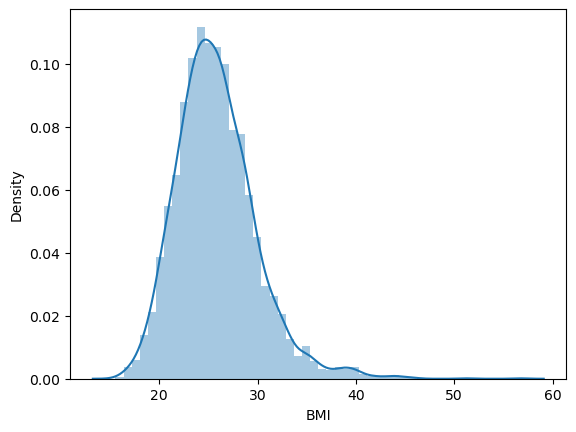

In [12]:
sns.distplot(data['BMI'])

## Relationships

In order to know `HeartStroke` further, we have to survey its relations with our features.

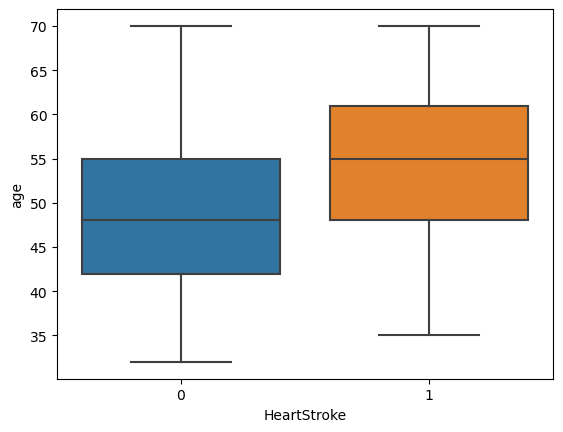

In [13]:
# age / HeartStroke
sns.boxplot(data = data , x='HeartStroke', y= 'age')
plt.show()

The risk of stroke increases with age.
This can be an important parameter for us.

We want to know how Gender can impact on HeartStroke.
**Female = 0 , Male = 1**

In [14]:
groupByGender= data.groupby(by='Gender')
groupByGender['Gender'].value_counts()

Gender
0    2419
1    1819
Name: count, dtype: int64

We have more Famales in our data.

In [15]:
groupByGender['HeartStroke'].sum()

Gender
0    301
1    343
Name: HeartStroke, dtype: int64

But Males are more exposed to HeartStroke.

In [16]:
groupByGender['HeartStroke'].sum()/groupByGender['Gender'].value_counts()

Gender
0    0.124432
1    0.188565
dtype: float64

Let's see if men are more smokers and we can relate it to heart attack or not.

In [17]:
groupByGender['currentSmoker'].value_counts()

Gender  currentSmoker
0       0                1431
        1                 988
1       1                1106
        0                 713
Name: count, dtype: int64

In [18]:
groupByGender['HeartStroke'].sum()/groupByGender['Gender'].value_counts()

Gender
0    0.124432
1    0.188565
dtype: float64

Men are more smokers✅

In [19]:
groupByCurrentSmoker = data.groupby(by='currentSmoker')
groupByCurrentSmoker['currentSmoker'].value_counts()

currentSmoker
0    2144
1    2094
Name: count, dtype: int64

In [20]:
groupByCurrentSmoker['HeartStroke'].sum()

currentSmoker
0    311
1    333
Name: HeartStroke, dtype: int64

In [21]:
groupByCurrentSmoker['HeartStroke'].sum()/groupByCurrentSmoker['currentSmoker'].value_counts()

currentSmoker
0    0.145056
1    0.159026
dtype: float64

As you can see in these data, the fact that people are smokers has not had much effect on the occurrence of heart attacks, so we cannot relate the fact that men are smokers as the reason why men have had more strokes than women.❌
But it was interesting for me to do more research in this field later.

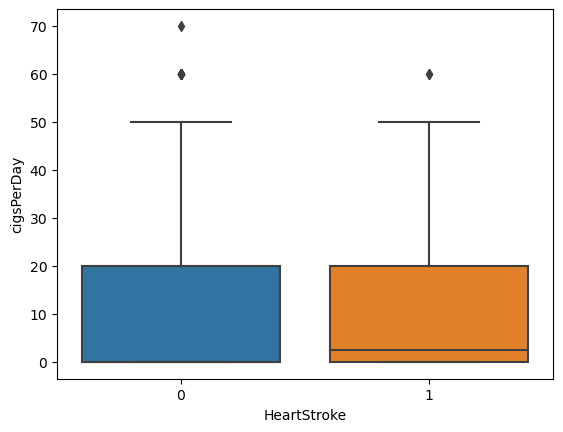

In [22]:
# cigsPerDay / HeartStroke
sns.boxplot(data = data , x='HeartStroke', y= 'cigsPerDay')
plt.show()

Also this box plot shows us that we don't have a relation between `HeartStroke` and `cigsPerDay`.
It's not make sense for me.

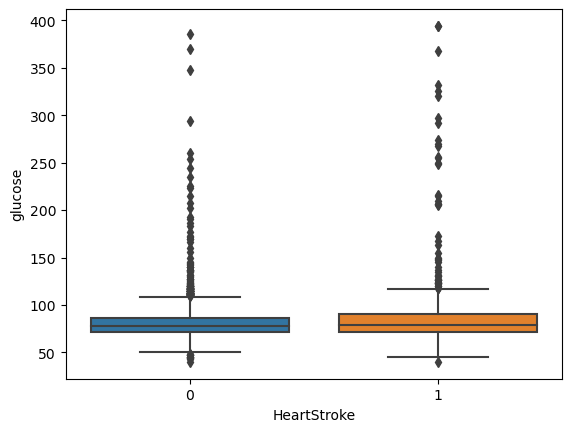

In [28]:
# glucose & HeartStroke
sns.boxplot(data = data , x='HeartStroke', y= 'glucose')
plt.show()

I couldnt find any relation between `HeartStroke` and `glucose`.

In [24]:
data.groupby(by='HeartStroke').mean()

,Gender,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
HeartStroke,,,,,,,,,,,,,,
0,0.410684,48.767668,0.489983,8.710401,0.023094,0.003895,0.275737,0.019199,235.172530,130.333612,82.160963,25.673007,75.762382,80.682125
1,0.532609,54.145963,0.517081,10.629283,0.063665,0.017081,0.504658,0.062112,245.388976,143.618789,86.981366,26.531451,76.530327,89.008418


# Missing Data

In [29]:
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(6)

,Total,Percent
glucose,388,0.091553
totChol,50,0.011798
cigsPerDay,29,0.006843
BMI,19,0.004483
heartRate,1,0.000236
Gender,0,0.000000


We have 3 option here.
1. We can drop Null values and we lose about 10% of data.
2. We can drop `glucose` and drop Null values. In this case we can save more data but we lose `glucose`.(uncomment the code bellow)
3. We can fill Null values with mean or something usefull.

In this case I use option 1.

In [30]:
# data = data.drop(columns=['glucose'],axis =1)

In [31]:
data.dropna(inplace =True) 
data.reset_index(inplace=True,drop=True)
data

,Gender,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,HeartStroke
0,1,39,0,0.0,0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3795,1,68,0,0.0,0,0,1,0,176.0,168.0,97.0,23.14,60.0,79.0,1
3796,1,50,1,1.0,0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
3797,1,51,1,43.0,0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
3798,0,48,1,20.0,0,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0


In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3800 entries, 0 to 3799
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           3800 non-null   int64  
 1   age              3800 non-null   int64  
 2   currentSmoker    3800 non-null   int64  
 3   cigsPerDay       3800 non-null   float64
 4   BPMeds           3800 non-null   int64  
 5   prevalentStroke  3800 non-null   int64  
 6   prevalentHyp     3800 non-null   int64  
 7   diabetes         3800 non-null   int64  
 8   totChol          3800 non-null   float64
 9   sysBP            3800 non-null   float64
 10  diaBP            3800 non-null   float64
 11  BMI              3800 non-null   float64
 12  heartRate        3800 non-null   float64
 13  glucose          3800 non-null   float64
 14  HeartStroke      3800 non-null   int64  
dtypes: float64(7), int64(8)
memory usage: 445.4 KB


In [33]:
X = data.drop(columns=['HeartStroke'])
y = data['HeartStroke']
print(f"X Shape:{X.shape}")
print(f"y Shape:{y.shape}")

X Shape:(3800, 14)
y Shape:(3800,)


The code below is related to the analysis part, but considering that the data has been cleaned and equalized in this part, it could be drawn.
With this code, we are trying to find two feature through which we can separate people who are prone to stroke.

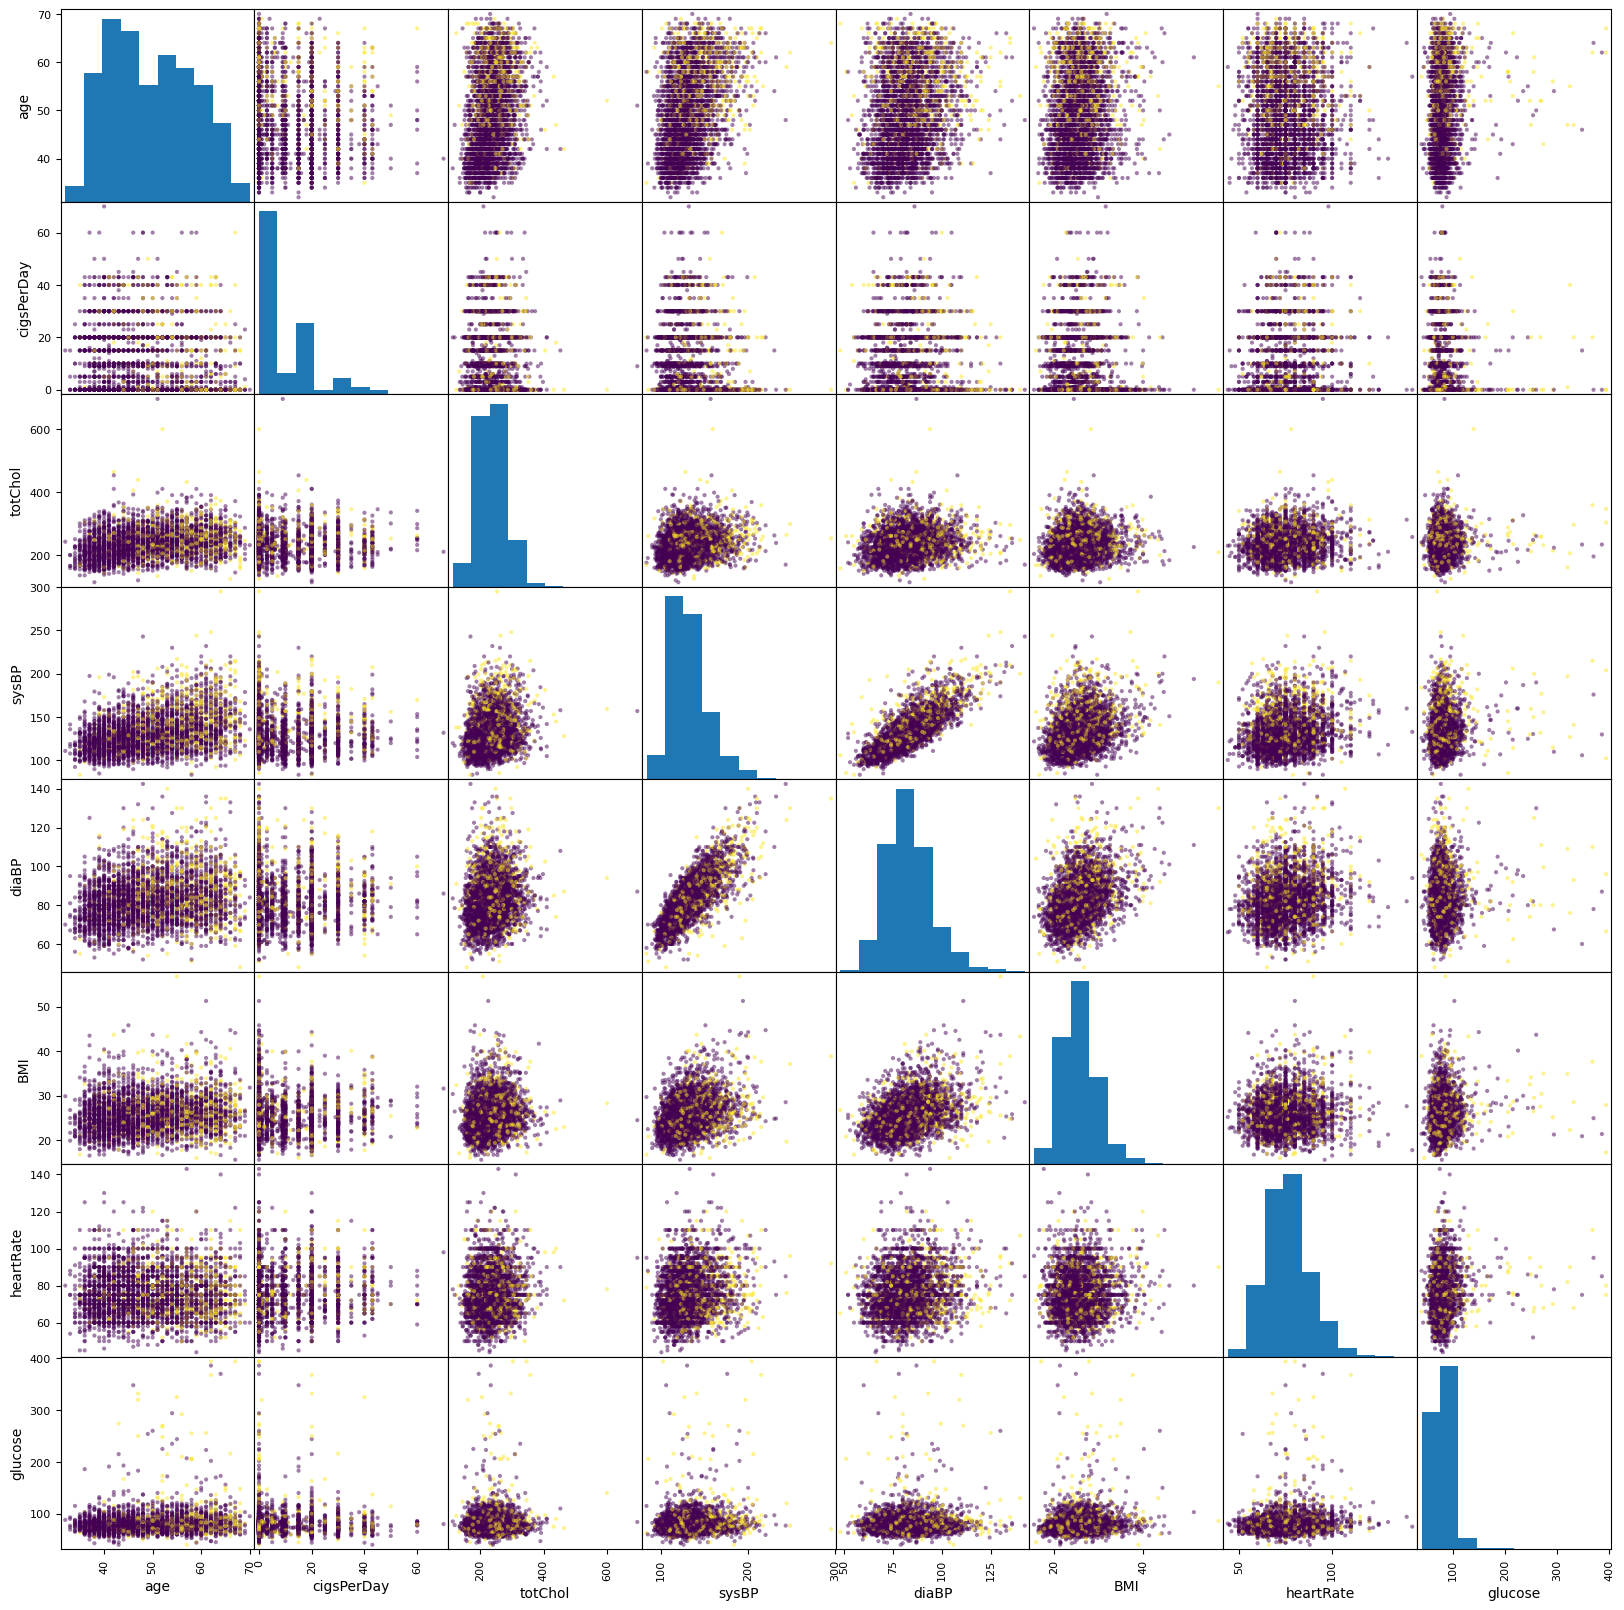

In [34]:
pd.plotting.scatter_matrix(X[numeric_columns], c=y, figsize=(20, 20));

 But as you can see, this diagram did not help us and the problem is more complicated.

# Duplicate

In [35]:
data.duplicated().sum()

0

We don't have any duplicated rows.

# Problem: Target Imbalance

In [36]:
y.value_counts()

HeartStroke
0    3217
1     583
Name: count, dtype: int64

**We found that data is imbalanced i.e 0 has larger values than 1 , so model may not give accurate results. So performing resampling.**

## sample generator

In [37]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=2,k_neighbors = 5)

In [38]:
X,y = sm.fit_resample(X,y.ravel())   # Using this the Data gets Balanced by having 3518 values of both categories
np.unique(y,return_counts=True) 

(array([0, 1], dtype=int64), array([3217, 3217], dtype=int64))

# Train Test Split

In [39]:
X_train , X_test , y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42 , stratify=y)
print(X_train.shape)
print(X_test.shape)

(4503, 14)
(1931, 14)


# Scaling

In [40]:
StScaler = StandardScaler()
X_train = StScaler.fit_transform(X_train)
X_test = StScaler.transform(X_test)

# Modeling

In [41]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=200,criterion ="log_loss" , random_state=42,oob_score=True, max_depth= None, max_features= 0.2, max_samples= 1.0)
model.fit(X_train, y_train)

y_train_pred =model.predict(X_train)
y_test_pred =model.predict(X_test)
print(accuracy_score(y_train,y_train_pred))
print(accuracy_score(y_test,y_test_pred))

1.0
0.8679440704298291


Accaracy score is not enough for us.
The thing we are predicting is very important and we cannot say that we had a good prediction just by this criterion.
I will explain more. In this case, if we predict that the person will not have a stroke, it is possible to prevent further follow-up and check-up of the patient, and if the person has a stroke, we have made an irreparable mistake.
But if we predict that a person will have a stroke, even if we predict wrongly, in the end, we have only caused the person to follow up more and do more tests, and compared to the previous case, this mistake is smaller.

In [42]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
# ytest , yhat
print(confusion_matrix(y_test, y_test_pred, labels=[1,0]))

[[870  95]
 [160 806]]


Confusion matrix, without normalization
[[870  95]
 [160 806]]


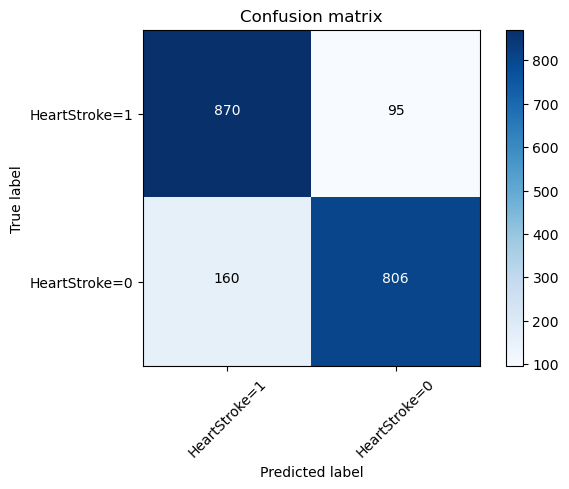

In [43]:
# Compute confusion matrix
# ytest , yhat
cnf_matrix = confusion_matrix(y_test, y_test_pred, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['HeartStroke=1','HeartStroke=0'],normalize= False,  title='Confusion matrix')

In [44]:
Preprecision=cnf_matrix[0,0]/(cnf_matrix[0,0]+cnf_matrix[1,0])
recall=cnf_matrix[0,0]/(cnf_matrix[0,0]+cnf_matrix[0,1])
print(f'Preprecision:{Preprecision}')
print(f'recall:{recall}')

Preprecision:0.8446601941747572
recall:0.9015544041450777


Recall is more important for us in this case.

In [45]:
print (classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.89      0.83      0.86       966
           1       0.84      0.90      0.87       965

    accuracy                           0.87      1931
   macro avg       0.87      0.87      0.87      1931
weighted avg       0.87      0.87      0.87      1931



# Conclusion: Predicting Heart Stroke Using Random Forest
In this heart stroke prediction study, we followed a systematic approach:

1. **Data Loading and Analysis**:
   - We loaded the dataset and identified the importance of age as a significant factor in heart stroke risk.
   - Analyzing the data helped us understand the underlying patterns.


2. **Handling Imbalanced Data**:
   - Recognizing the class imbalance in our target variable, we employed a powerful technique: oversampling using `imblearn.over_sampling`.
   - This approach helped mitigate the imbalance issue and improved model performance.


3. **Random Forest Classifier**:
   - We trained a Random Forest classifier, leveraging its ensemble capabilities.
   - Random Forest is robust, handles non-linear relationships, and provides feature importance scores.


4. **Model Evaluation**:
   - We evaluated our model using two key metrics:
     - **Accuracy**: Overall correctness of predictions.
     - **Confusion Matrix**: Revealed true positives, false positives, true negatives, and false negatives.
   - However, we emphasized the importance of **recall** (true positive rate) in this context:
     - Recall ensures that we correctly identify actual stroke cases, minimizing false negatives.
